**clean up of the individual and the combined files**

In [1]:
#load all the relevant packages
import pandas as pd
import numpy as np
import os
import pycountry
import re
import datetime
import seaborn as sns
import matplotlib as mlt

# load the dataframe

In [36]:
df = pd.read_csv('OFAC SDN/us_ofac_sdn.csv',low_memory=False)
df

,Unnamed: 0,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,emails,dataset,date_stamp,last_change,listing_date,delisting_date,month
0,0,NK-226JTDehVMSXex35EbKPmi,Organization,BENA PROPERTIES,BANNA PROPERTIES;BENA,NaN,sy,"Cham Holding Building, Daraa Highway, Sahnaya ...",NaN,Block - Program - SDN List - Executive Order 1...,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210930,NaN,20210930,NaN,2021-09
1,1,NK-22HtK7WrxZ2sU3rmhz6PuZ,Person,Michael Kuajien,Michael Kuajian;Michael Kuajien Duer Mayok,1979-01-01,ke;ss,Nairobi;South Sudan,NaN,Program - Block - SDN List - Executive Order 1...,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210928,NaN,20210928,NaN,2021-09
2,2,NK-22iRdVwQHXiYMCAASM93qH,Organization,AL RASHID TRUST,AL AMEEN TRUST;AL AMIN TRUST;AL AMIN WELFARE T...,NaN,pk,"Jamia Masjid, Sulaiman Park, Begum Pura, Lahor...",NaN,Block - Program - SDN List - Unknown - 2001-09-24,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210918,NaN,20210918,NaN,2021-09
3,3,NK-22jYwFUGYJxd6bKdMnxb22,Organization,NEGIN PARTO KHAVAR,ERTEBATE EGHTESSADE MONIR;NEGIN PARTO;NEGIN PA...,NaN,ir,"Tehran, Fatmi Gharabi Street, between Sindokht...",NaN,Block - Program - SDN List - Executive Order 1...,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210918,NaN,20210918,NaN,2021-09
4,4,NK-22oMG6jqPQknWaMjzTn4hK,Company,Limited Liability Company Garantiya,Garantiya OOO,NaN,ru,"bulvar Tverskoi, d. 15 str. 2, Moscow",5067746901426;7703610362,Block - SDN List - Program - Executive Order 1...,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20230226,NaN,20230226,NaN,2023-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29648,29648,ofac-sdn-9993,Person,Yolanda Sofia CANO ALZATE,NaN,1957-04-25,co,"c/o GAVIOTAS LTDA., Colombia",31399608,SDN List - Block - Program - Unknown - 2006-10-25,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210820,NaN,20210820,NaN,2021-08
29649,29649,ofac-sdn-9994,Person,Davinson GOMEZ OCAMPO,GORDO,1960-07-10,co,"Calle 16 No. 1-58, Cartago, Valle, Colombia;c/...",2470433,SDN List - Block - Program - Unknown - 2006-10-25,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210820,NaN,20210820,NaN,2021-08
29650,29650,ofac-sdn-9995,Person,Carlos Arturo PATINO RESTREPO,PATE MURO;PATEMURO,1964-04-27,co,"Calle 20 No. 6-30, Ofc. 1304, Pereira, Risaral...",9991679,SDN List - Block - Program - Unknown - 2006-10-25,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210820,NaN,20210820,NaN,2021-08
29651,29651,ofac-sdn-9996,Person,Luis Alfonso GOMEZ BUSTAMANTE,NaN,1953-11-01,co,"Calle 1B No. 1-26, Barrio El Prado, Cartago, V...",4451571,SDN List - Block - Program - Unknown - 2006-10-25,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210820,NaN,20210820,NaN,2021-08


# get the number of listings per day

In [37]:
df['listing_count'] = df.id.nunique 

ValueError: Length of values (0) does not match length of index (29653)

# clean up country and iso columns

In [10]:
df.countries.unique()

array(['sy', 'ke;ss', 'pk', 'ir', 'ru', 'cd;rw', 'de', 'by', 'kp', 'co',
       'ae', 'mx', 'be', 'il;md;ru', 'iq', 'gr', 'gb;ir', nan, 'zw',
       'ch;fr', 'cn', 've', 'tw', 'li', 'co;es;pa', 'cf', 'ru;ua', 'cy',
       'ao', 'gb', 'mt', 'lb;ps', 'vc', 'gm', 'ni', 'mx;us', 'ch;co',
       'ir;sy', 'lb', 'cz;ru', 'ch', 'my', 'jp', 'ye', 'tn', 'us',
       'cy;gb;gh;gr;sy', 'sa', 'km', 'ae;ru;uz', 'eg', 'pk;sa', 'sk;ve',
       'au', 'iq;sy', 'tr', 'fr;ml', 'af;ir;pk', 'mh', 'mm', 'lb;ng;sl',
       'cn;hk', 'sg', 'cd;kp', 'cr', 'jo', 'ar', 'fr', 'lv;tr', 'ca',
       'rs', 'nl', 'cn;kp', 'it;tn', 'bg', 'it', 'sv', 'at', 'pa',
       'lv;ru', 'uz', 'ae;in', 'sd', 'cy;it;mc', 'aw;co;ve',
       'ar;bg;ca;de;es;it;kp;mx;nl;pl;ru', 'gb;sd', 'iq;tr', 'id',
       'er;et', 'bi', 'co;ve', 'ae;sy', 'ht', 'af;pk', 'fi;ru', 'ec',
       'ly', 'ph', 'pa;sl;tr', 'ae;lr', 'za', 'ng', 'de;jo', 'af', 'es',
       'de;iq', 'cd', 'bh', 'iq;ir', 'er;ke', 'tj', 'ke', 'gb;ru',
       'il;it;ru', 'gb;sy',

In [19]:
iso =pd.read_csv('country-codes_csv.csv')
iso = iso.filter(['ISO3166-1-Alpha-3', 'MARC'])
display(iso)

,ISO3166-1-Alpha-3,MARC
0,TWN,ch
1,AFG,af
2,ALB,aa
3,DZA,ae
4,ASM,as
...,...,...
245,ESH,ss
246,YEM,ye
247,ZMB,za
248,ZWE,rh


In [22]:
#create the country names from iso2 codes
iso_list = iso.values.tolist()
#now extract the matches for the marc country codes of the countries column 
#and the iso list and for each match add the corresponding ISO code
#if multiple matches exist, pivot the table
#using regular expression to match strings
import re
print(re.findall())
dta_clean['iso'] = N.A.
for i in dta_clean['countries']:
    if i isin iso.MARC:
        return iso.['ISO3166-1-Alpha-3']
    else skip

In [ ]:
#check for completeness

# clean up the sanctions column

# create year and month ids

# get descriptive statistics of the dataframe

In [24]:
us = pd.read_csv('OFAC SDN/us_ofac_sdn.csv',low_memory=False)
eu = pd.read_csv('EU FSF/eu_fsf.csv',low_memory=False)
sanctions_map = pd.read_csv('EU Sanctions Map/eu_sanctions_map.csv',low_memory=False)
bis = pd.read_csv('OFAC BIS/us_bis_denied.csv',low_memory=False)
cons = pd.read_csv('OFAC Consolidated/ofac_cons.csv',low_memory=False)

In [41]:
data = us.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)

Index(['Unnamed: 0', 'id', 'schema', 'name', 'aliases', 'birth_date',
       'countries', 'addresses', 'identifiers', 'sanctions', 'phones',
       'emails', 'dataset', 'date_stamp', 'last_change', 'listing_date',
       'delisting_date', 'month'],
      dtype='object')
         Unnamed: 0    date_stamp  listing_date  delisting_date
count  29653.000000  2.965300e+04  2.965300e+04    8.580000e+02
mean   14826.000000  2.021601e+07  2.021601e+07    2.022497e+07
std     8560.228102  7.613610e+03  7.613610e+03    5.540386e+03
min        0.000000  2.021082e+07  2.021082e+07    2.021092e+07
25%     7413.000000  2.021082e+07  2.021082e+07    2.022093e+07
50%    14826.000000  2.021093e+07  2.021093e+07    2.022093e+07
75%    22239.000000  2.022062e+07  2.022062e+07    2.023091e+07
max    29652.000000  2.023123e+07  2.023123e+07    2.023122e+07
['Organization' 'Person' 'Company' 'Airplane' 'Vessel']
['2021-09' '2023-02' '2022-08' '2023-03' '2023-09' '2023-11' '2023-12'
 '2022-11' '2023-05' '2022

In [50]:
data=data.groupby(pd.Grouper(freq='M',key='id'))['listing_count'].sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
df.groupby(pd.Grouper(freq='M', key='last_payout'))['amount'].sum()

In [46]:
data

,Unnamed: 0,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,emails,dataset,date_stamp,last_change,listing_date,delisting_date,month,listing_count
0,0,NK-226JTDehVMSXex35EbKPmi,Organization,BENA PROPERTIES,BANNA PROPERTIES;BENA,NaN,sy,"Cham Holding Building, Daraa Highway, Sahnaya ...",NaN,Block - Program - SDN List - Executive Order 1...,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210930,NaN,20210930,NaN,2021-09,NaN
1,1,NK-22HtK7WrxZ2sU3rmhz6PuZ,Person,Michael Kuajien,Michael Kuajian;Michael Kuajien Duer Mayok,1979-01-01,ke;ss,Nairobi;South Sudan,NaN,Program - Block - SDN List - Executive Order 1...,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210928,NaN,20210928,NaN,2021-09,NaN
2,2,NK-22iRdVwQHXiYMCAASM93qH,Organization,AL RASHID TRUST,AL AMEEN TRUST;AL AMIN TRUST;AL AMIN WELFARE T...,NaN,pk,"Jamia Masjid, Sulaiman Park, Begum Pura, Lahor...",NaN,Block - Program - SDN List - Unknown - 2001-09-24,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210918,NaN,20210918,NaN,2021-09,NaN
3,3,NK-22jYwFUGYJxd6bKdMnxb22,Organization,NEGIN PARTO KHAVAR,ERTEBATE EGHTESSADE MONIR;NEGIN PARTO;NEGIN PA...,NaN,ir,"Tehran, Fatmi Gharabi Street, between Sindokht...",NaN,Block - Program - SDN List - Executive Order 1...,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210918,NaN,20210918,NaN,2021-09,NaN
4,4,NK-22oMG6jqPQknWaMjzTn4hK,Company,Limited Liability Company Garantiya,Garantiya OOO,NaN,ru,"bulvar Tverskoi, d. 15 str. 2, Moscow",5067746901426;7703610362,Block - SDN List - Program - Executive Order 1...,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20230226,NaN,20230226,NaN,2023-02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29648,29648,ofac-sdn-9993,Person,Yolanda Sofia CANO ALZATE,NaN,1957-04-25,co,"c/o GAVIOTAS LTDA., Colombia",31399608,SDN List - Block - Program - Unknown - 2006-10-25,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210820,NaN,20210820,NaN,2021-08,NaN
29649,29649,ofac-sdn-9994,Person,Davinson GOMEZ OCAMPO,GORDO,1960-07-10,co,"Calle 16 No. 1-58, Cartago, Valle, Colombia;c/...",2470433,SDN List - Block - Program - Unknown - 2006-10-25,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210820,NaN,20210820,NaN,2021-08,NaN
29650,29650,ofac-sdn-9995,Person,Carlos Arturo PATINO RESTREPO,PATE MURO;PATEMURO,1964-04-27,co,"Calle 20 No. 6-30, Ofc. 1304, Pereira, Risaral...",9991679,SDN List - Block - Program - Unknown - 2006-10-25,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210820,NaN,20210820,NaN,2021-08,NaN
29651,29651,ofac-sdn-9996,Person,Luis Alfonso GOMEZ BUSTAMANTE,NaN,1953-11-01,co,"Calle 1B No. 1-26, Barrio El Prado, Cartago, V...",4451571,SDN List - Block - Program - Unknown - 2006-10-25,NaN,NaN,US OFAC Specially Designated Nationals (SDN) List,20210820,NaN,20210820,NaN,2021-08,NaN


<Axes: xlabel='month', ylabel='id'>

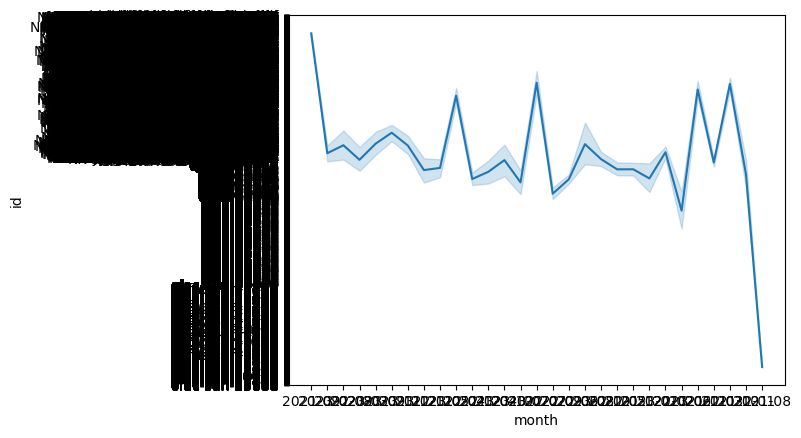

In [34]:
#get the listings per month
listings_us = sns.lineplot(data=data,x='month',y='id')
listings_us

# filter for russia

In [ ]:
df_russia = data(data['country'] == 'RUS')